In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
os.chdir('..')

In [9]:
import concurrent.futures
import random
import stock_analisys.packages.paths as paths
import pandas as pd
import time
import stock_analisys.packages.fundamentei_class as fc
import stock_analisys.packages.plots as plot

## Grabing Table from Ticker

In [ ]:
import stock_analisys.packages.fundamentei_class as fc

evaluate_test = fc.FundamenteiEvaluate("a")
evaluate_test.table_extract()
display(evaluate_test.company_full_data)

# Plot Config 

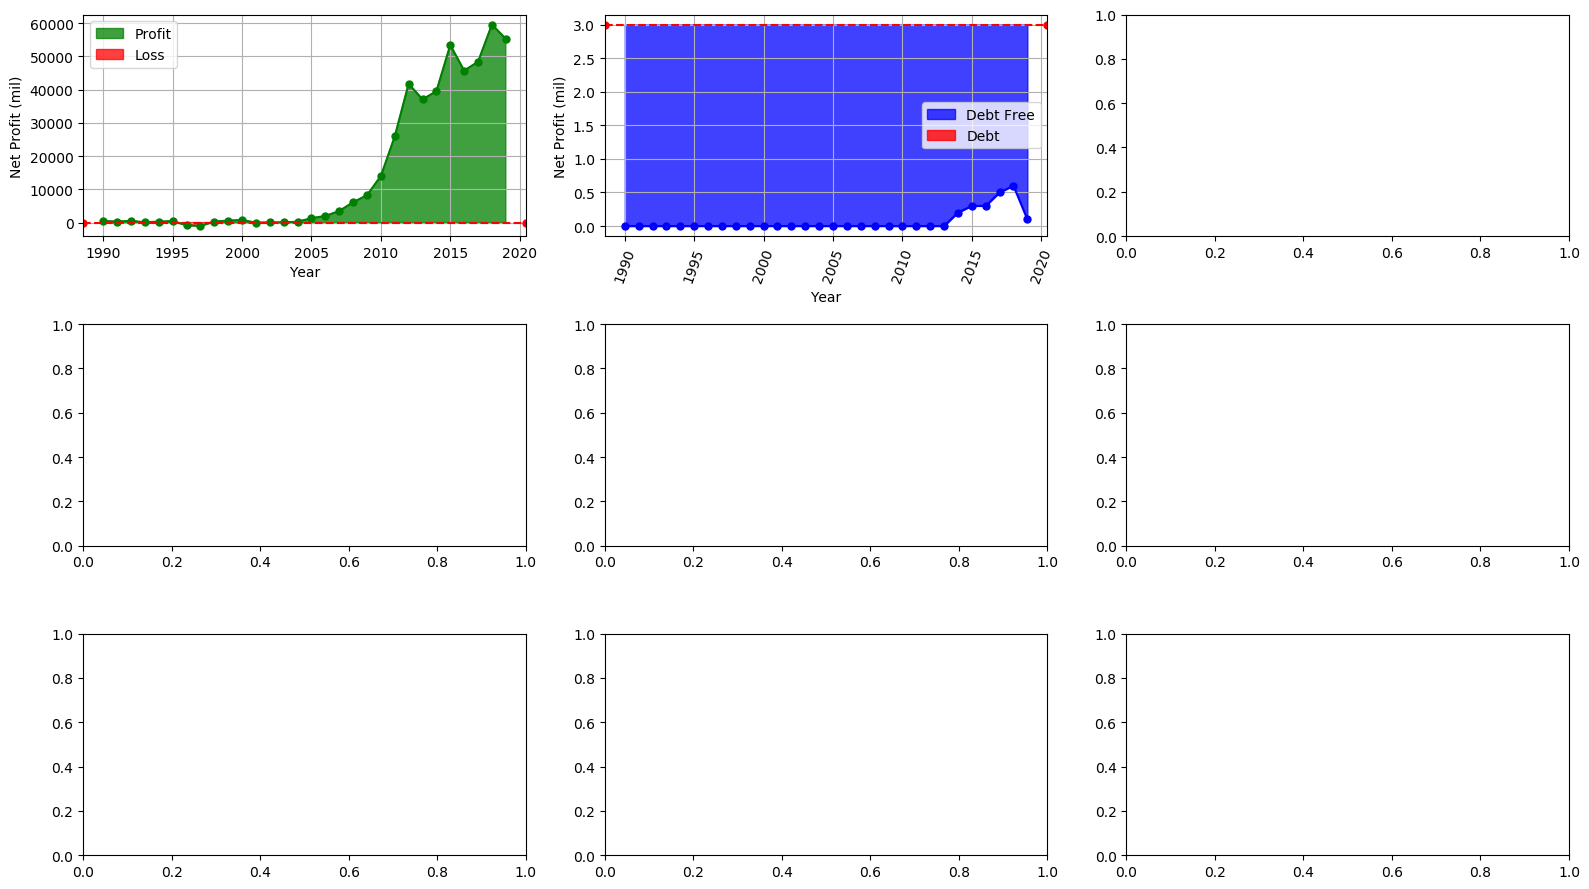

,Year,Equity,Revenue,EBITDA,D&A,EBIT,Fin. Res.,Taxes,Net Inc.,Net Mar.,ROE,Cash,Debt,N.D. / EBITDA,OCF,CAPEX,FCF,Free,Div.,Payout
0,1990,1447.0,5558.0,915.0,-203.0,712.0,0.0,-304.0,475.0,9.0,33.0,375.0,123.0,0.0,964.0,-224.0,-454.0,740.0,54.0,11.0
1,1991,1767.0,6309.0,652.0,-204.0,447.0,0.0,-190.0,310.0,5.0,18.0,604.0,149.0,0.0,129.0,-218.0,43.0,-90.0,57.0,18.0
2,1992,2187.0,7087.0,1081.0,-217.0,864.0,63.0,-325.0,530.0,7.0,24.0,499.0,185.0,0.0,921.0,-195.0,-114.0,726.0,57.0,11.0
3,1993,2026.0,7977.0,318.0,-166.0,152.0,58.0,-53.0,87.0,1.0,4.0,892.0,830.0,0.0,-651.0,-213.0,336.0,-864.0,56.0,64.0
4,1994,2383.0,9189.0,708.0,-168.0,540.0,3.0,-190.0,310.0,3.0,13.0,1258.0,597.0,0.0,737.0,-160.0,-208.0,577.0,56.0,18.0
5,1995,2901.0,11062.0,849.0,-127.0,722.0,52.0,-250.0,424.0,4.0,15.0,952.0,764.0,0.0,-240.0,-159.0,195.0,-399.0,58.0,14.0
6,1996,2058.0,9833.0,-1119.0,-116.0,-1235.0,0.0,479.0,-816.0,0.0,0.0,1745.0,1135.0,0.0,408.0,-67.0,396.0,341.0,14.0,2.0
7,1997,1200.0,7081.0,-856.0,-118.0,-974.0,11.0,0.0,-1045.0,0.0,0.0,1459.0,976.0,0.0,154.0,-437.0,23.0,-283.0,0.0,0.0
8,1998,1642.0,5941.0,502.0,-111.0,391.0,38.0,-20.0,309.0,5.0,19.0,2300.0,954.0,0.0,775.0,-46.0,19.0,729.0,0.0,0.0
9,1999,3104.0,6134.0,808.0,-85.0,723.0,97.0,-75.0,601.0,10.0,19.0,3226.0,300.0,0.0,822.0,-71.0,11.0,751.0,0.0,0.0


In [34]:
stock_obj = fc.FundamenteiEvaluate("aapl")
df = stock_obj.table_extract()
plot.fundamentei_data_graph(df)
df